In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:

file_path = "https://raw.githubusercontent.com/juankquintana/aprendizaje-no-supervisado/main/Proyecto/data/movies_metadata.csv"

metadata = pd.read_csv(file_path)

metadata.head(5)

<ipython-input-2-ec0f761ae13f>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(file_path)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
# Convertir Budget y popularity a datos numericos

metadata['popularity'] = pd.to_numeric(metadata['popularity'], errors='coerce')

# Limpiar y convertir la columna 'budget' a tipo float
metadata['budget'] = pd.to_numeric(metadata['budget'], errors='coerce')

In [4]:
# Conversion de las columnas, genero, production companie y production country

import ast

def columnas_transformadas(metadata, columna, indicador, nuevo_nombre):
    # Crear una nueva columna temporal con los datos convertidos
    metadata['col_p'] = metadata[columna].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    # Extraer el valor deseado
    metadata[nuevo_nombre] = metadata['col_p'].apply(lambda x: [genre_p[indicador] for genre_p in x] if isinstance(x, list) else [])
    # Eliminar la columna temporal
    metadata = metadata.drop(columns=['col_p'])
    # Mostrar las primeras filas del nuevo nombre de columna
    print(metadata[nuevo_nombre].head(5))
    return metadata


metadata = columnas_transformadas(metadata, 'production_companies', 'name', 'production_company_names')
metadata = columnas_transformadas(metadata, 'production_countries', 'iso_3166_1', 'production_country_names')
metadata = columnas_transformadas(metadata, 'spoken_languages', 'iso_639_1', 'spoken_language_names')

0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
2                       [Warner Bros., Lancaster Gate]
3             [Twentieth Century Fox Film Corporation]
4         [Sandollar Productions, Touchstone Pictures]
Name: production_company_names, dtype: object
0    [US]
1    [US]
2    [US]
3    [US]
4    [US]
Name: production_country_names, dtype: object
0        [en]
1    [en, fr]
2        [en]
3        [en]
4        [en]
Name: spoken_language_names, dtype: object


In [5]:
import ast

def columnas_transformadas_2(metadata, columna, indicador, nuevo_nombre):
    # Crear una nueva columna temporal con los datos convertidos
    metadata['col_p'] = metadata[columna].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    # Extraer el valor deseado
    metadata[nuevo_nombre] = metadata['col_p'].apply(lambda x: [genre_p[indicador] for genre_p in x] if isinstance(x, list) else [])
    # Eliminar la columna temporal
    metadata = metadata.drop(columns=['col_p'])
    # Mostrar las primeras filas del nuevo nombre de columna
    print(metadata[nuevo_nombre].head(5))

    # Encontrar y eliminar filas donde la nueva columna tiene listas vacías
    metadata = metadata[metadata[nuevo_nombre].apply(lambda x: len(x) > 0)]

    # Mostrar las filas con listas vacías
    #print("Filas con listas vacías en la columna '{}':".format(nuevo_nombre))
    #print(filas_vacias)

    return metadata


metadata = columnas_transformadas_2(metadata, 'genres', 'name', 'genre_names')



0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genre_names, dtype: object


Cantidad de datos genre_names 32


<ipython-input-6-f187806b2d4d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='movie_count', y=columna, data=top_25_genres, palette='viridis')


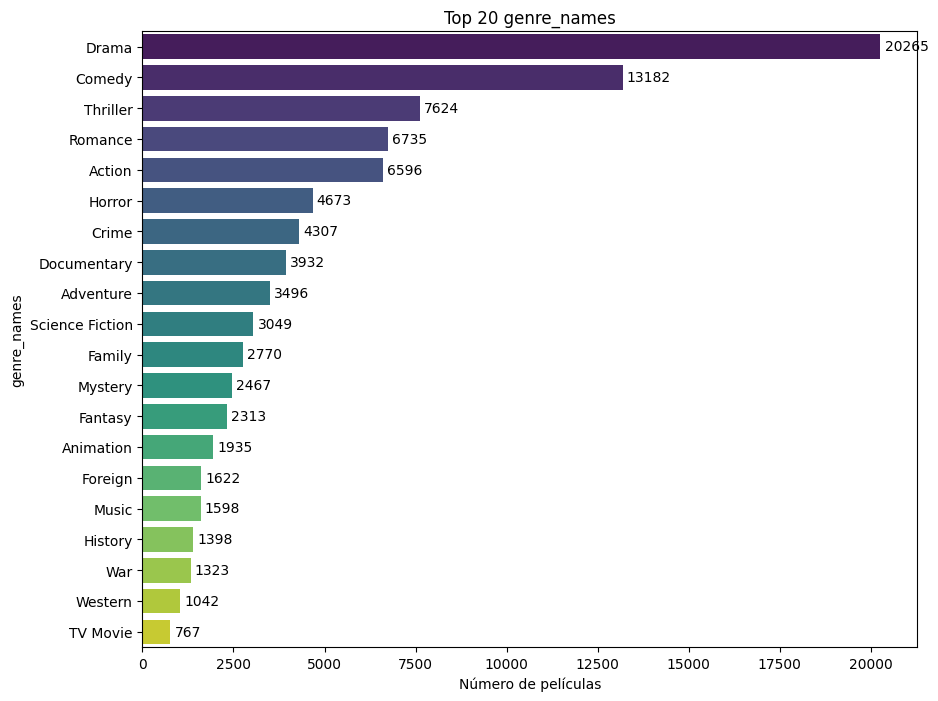

Cantidad de datos production_company_names 23390


<ipython-input-6-f187806b2d4d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='movie_count', y=columna, data=top_25_genres, palette='viridis')


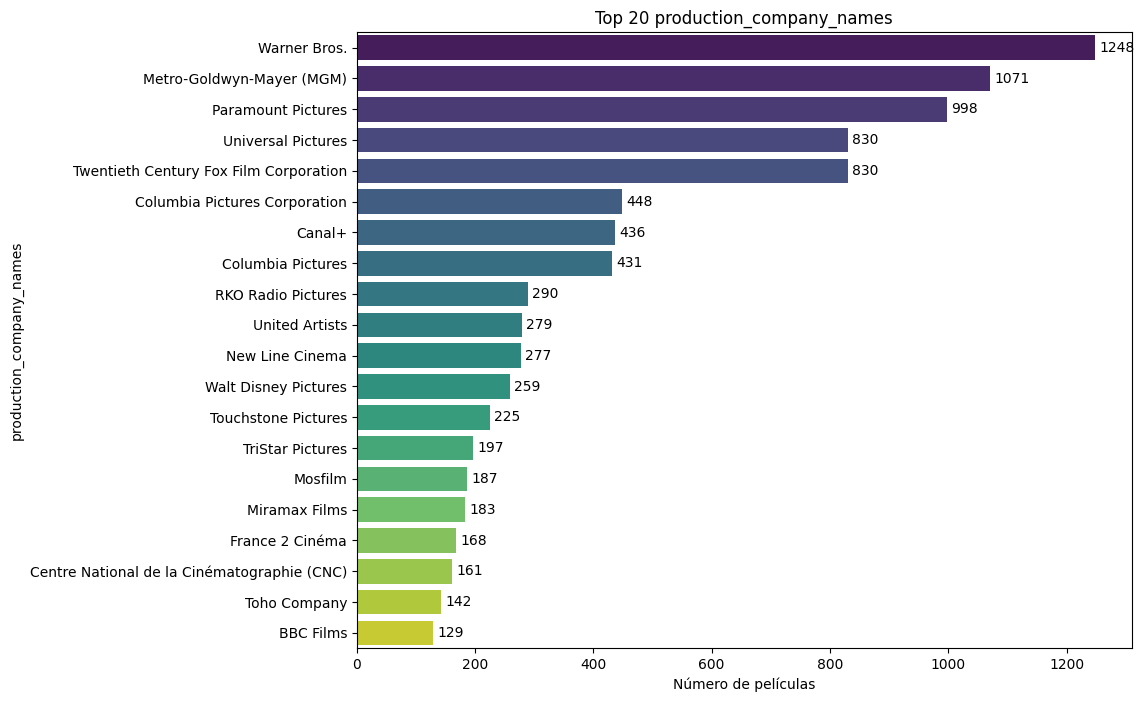

Cantidad de datos production_country_names 158


<ipython-input-6-f187806b2d4d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='movie_count', y=columna, data=top_25_genres, palette='viridis')


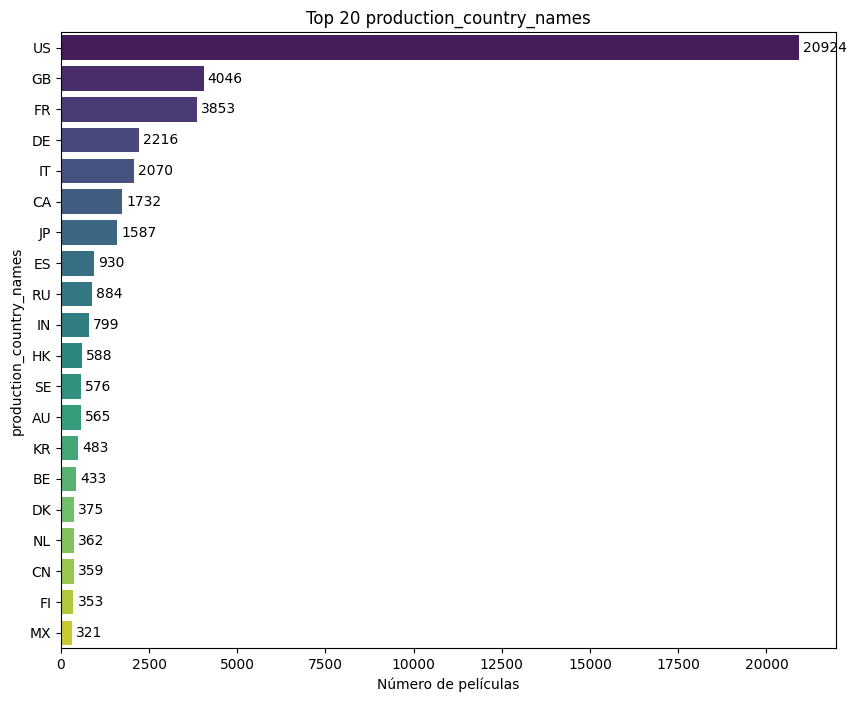

Cantidad de datos spoken_language_names 133


<ipython-input-6-f187806b2d4d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='movie_count', y=columna, data=top_25_genres, palette='viridis')


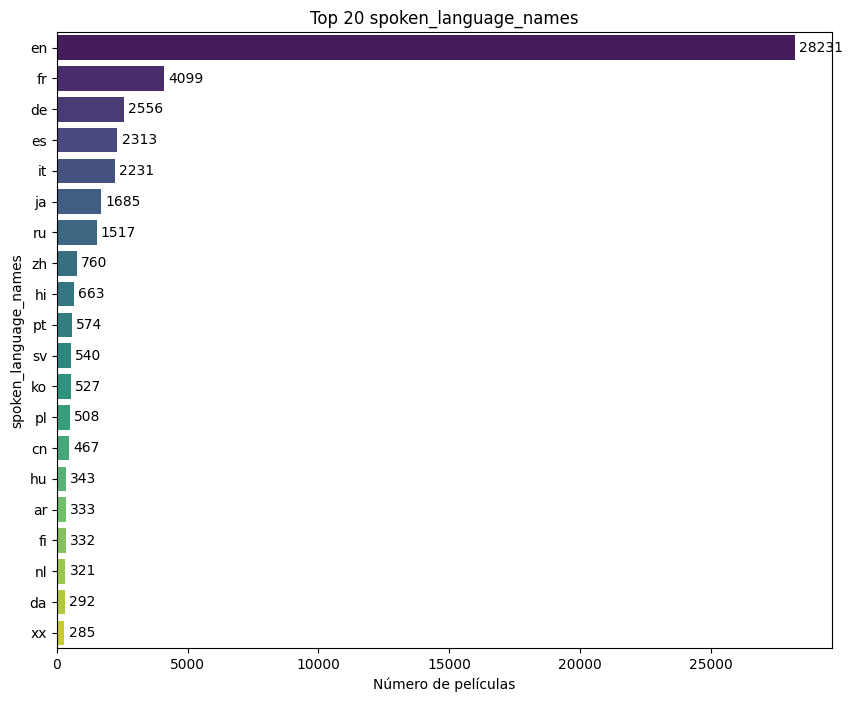

In [6]:
for columna in ('genre_names','production_company_names','production_country_names','spoken_language_names'):
    metadata_exploded = metadata.explode(columna)
    print('Cantidad de datos', columna, metadata_exploded[columna].nunique())

    # Luego, contar cuántas veces aparece cada género
    genre_counts = metadata_exploded[columna].value_counts().reset_index()
    genre_counts.columns = [columna, 'movie_count']

    # Seleccionar solo el top 25 géneros
    top_25_genres = genre_counts.head(20)

    # Graficar los datos
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x='movie_count', y=columna, data=top_25_genres, palette='viridis')

    # Agregar etiquetas de datos
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

    plt.xlabel('Número de películas')
    plt.ylabel(columna)
    plt.title('Top 20 {}'.format(columna))
    plt.show()

# Keywords

In [7]:
file_path_ratings = "https://media.githubusercontent.com/media/juankquintana/proyecto_recomendacion_peliculas/main/data/ratings_sample.csv"

df_ratings = pd.read_csv(file_path_ratings)

df_ratings.head(5)


,userId,movieId,rating,timestamp
0,123687,163,4.0,1259948252
1,135533,55118,4.5,1451620634
2,741,3499,4.0,1247359351
3,170293,2571,3.0,1438244027
4,221195,4973,4.0,1465065341


In [8]:
unique_values_id_ppl = df_ratings['userId'].unique()
len(unique_values_id_ppl)

253107

In [9]:
len(df_ratings['movieId'].unique())

31629

<ipython-input-10-aa48585edf73>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='rating', y='movie_count', data=movie_counts, palette='viridis')


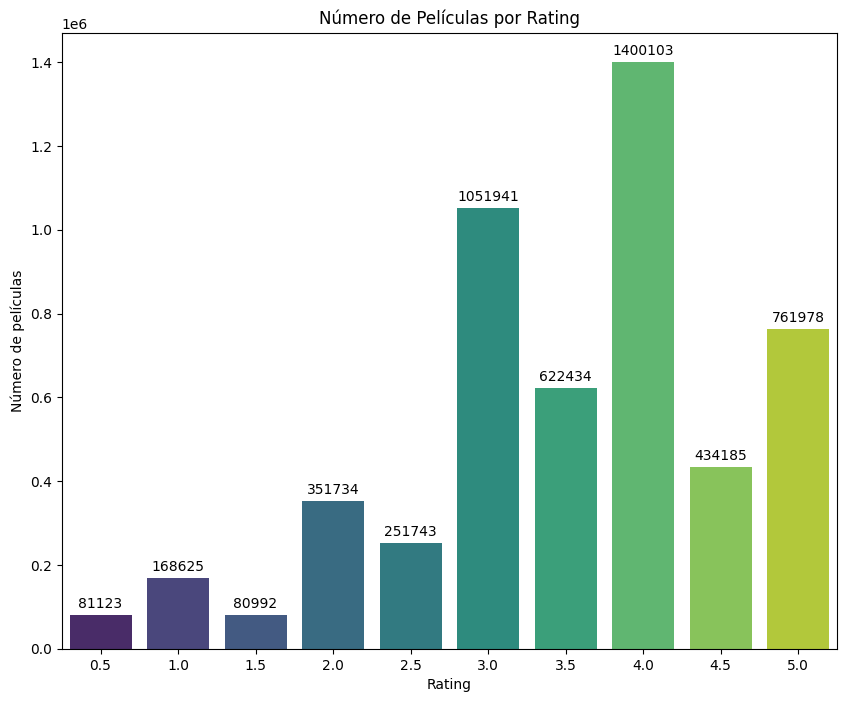

In [10]:
movie_counts = df_ratings.groupby('rating')['movieId'].count().reset_index(name='movie_count')

# Ordenar los datos por rating para una mejor visualización
movie_counts = movie_counts.sort_values('rating', ascending=True)

# Graficar los datos
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='rating', y='movie_count', data=movie_counts, palette='viridis')

# Agregar etiquetas de datos
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge', padding=3)

plt.xlabel('Rating')
plt.ylabel('Número de películas')
plt.title('Número de Películas por Rating')
plt.show()

In [11]:
# Convert 'movieId' column in df_ratings to object type
df_ratings['movieId'] = df_ratings['movieId'].astype(str)

# Now perform the merge operation
user_gener_c = pd.merge(df_ratings, metadata[['id', 'original_title', 'genre_names']],
                     left_on='movieId', right_on='id', how='left')

# Seleccionar solo las columnas que necesitas
user_gener_c = user_gener_c[['userId', 'movieId', 'rating', 'timestamp', 'original_title', 'genre_names']]

# Mostrar el DataFrame final
user_gener_c.head()

,userId,movieId,rating,timestamp,original_title,genre_names
0,123687,163,4.0,1259948252,Ocean's Twelve,"[Thriller, Crime]"
1,135533,55118,4.5,1451620634,NaN,NaN
2,741,3499,4.0,1247359351,NaN,NaN
3,170293,2571,3.0,1438244027,NaN,NaN
4,221195,4973,4.0,1465065341,Sous le Sable,"[Drama, Mystery]"


In [12]:
print("Columnas en el DataFrame:")
print(user_gener_c.info())

Columnas en el DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5205048 entries, 0 to 5205047
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   userId          int64  
 1   movieId         object 
 2   rating          float64
 3   timestamp       int64  
 4   original_title  object 
 5   genre_names     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 238.3+ MB
None


In [13]:
# Calcular el porcentaje de datos vacíos para cada columna
missing_data = user_gener_c.isnull().sum()  # Contar valores nulos por columna
total_data = len(user_gener_c)  # Número total de filas en el DataFrame
missing_percentage = (missing_data / total_data) * 100  # Calcular porcentaje

# Crear un DataFrame para mostrar la información
missing_data_summary = pd.DataFrame({
    'Total Missing': missing_data,
    'Percentage Missing': missing_percentage
})

# Ordenar por porcentaje de datos vacíos en orden descendente
missing_data_summary = missing_data_summary.sort_values(by='Percentage Missing', ascending=False)

# Mostrar el resumen de datos vacíos
print(total_data)
print(missing_data_summary)

5205048
                Total Missing  Percentage Missing
original_title        2929796           56.287589
genre_names           2929796           56.287589
userId                      0            0.000000
movieId                     0            0.000000
rating                      0            0.000000
timestamp                   0            0.000000


In [14]:
# Eliminar filas con valores nulos en la columna 'genre_names'
user_gener_c = user_gener_c.dropna(subset=['genre_names'])
user_gener_c = user_gener_c.dropna(subset=['original_title'])
print(len(user_gener_c))
user_gener_c.head()


usuarios_clusters = user_gener_c.copy()

2275252


In [15]:
user_gener_c.count()

,0
userId,2275252
movieId,2275252
rating,2275252
timestamp,2275252
original_title,2275252
genre_names,2275252


In [16]:
usuarios_clusters.head(5)

,userId,movieId,rating,timestamp,original_title,genre_names
0,123687,163,4.0,1259948252,Ocean's Twelve,"[Thriller, Crime]"
4,221195,4973,4.0,1465065341,Sous le Sable,"[Drama, Mystery]"
11,134366,1643,4.0,960702344,Ultimo tango a Parigi,"[Drama, Romance]"
14,20721,3034,3.5,1421339357,Young Frankenstein,"[Comedy, Science Fiction]"
15,225569,165,5.0,840902426,Back to the Future Part II,"[Adventure, Comedy, Family, Science Fiction]"


In [17]:
# Calcular el número promedio de películas vistas por usuario
avg_movies_per_user = user_gener_c.groupby('userId')['movieId'].count().mean()

# Calcular el mínimo y máximo de películas vistas por usuario
min_movies_per_user = user_gener_c.groupby('userId')['movieId'].count().min()
max_movies_per_user = user_gener_c.groupby('userId')['movieId'].count().max()

print(f"Promedio de películas vistas por usuario: {avg_movies_per_user}")
print(f"Mínimo de películas vistas por usuario: {min_movies_per_user}")
print(f"Máximo de películas vistas por usuario: {max_movies_per_user}")


Promedio de películas vistas por usuario: 9.959344113038073
Mínimo de películas vistas por usuario: 1
Máximo de películas vistas por usuario: 669


In [18]:
# Crear una nueva columna con los géneros separados
user_gener_c['genre_names_exploded'] = user_gener_c['genre_names'].apply(lambda x: [genre.strip() for genre in str(x).replace('[', '').replace(']', '').split(',')])

# Expandir las listas de géneros en columnas
user_gener_c = user_gener_c.explode('genre_names_exploded')

user_gener_c['genre'] = user_gener_c['genre_names_exploded'].str.replace("'", "", regex=False).str.strip()

user_gener_c.head()

,userId,movieId,rating,timestamp,original_title,genre_names,genre_names_exploded,genre
0,123687,163,4.0,1259948252,Ocean's Twelve,"[Thriller, Crime]",'Thriller',Thriller
0,123687,163,4.0,1259948252,Ocean's Twelve,"[Thriller, Crime]",'Crime',Crime
4,221195,4973,4.0,1465065341,Sous le Sable,"[Drama, Mystery]",'Drama',Drama
4,221195,4973,4.0,1465065341,Sous le Sable,"[Drama, Mystery]",'Mystery',Mystery
11,134366,1643,4.0,960702344,Ultimo tango a Parigi,"[Drama, Romance]",'Drama',Drama


In [19]:
generos_unicos = user_gener_c['genre'].unique()
print(generos_unicos)

['Thriller' 'Crime' 'Drama' 'Mystery' 'Romance' 'Comedy' 'Science Fiction'
 'Adventure' 'Family' 'Horror' 'History' 'TV Movie' 'Fantasy' 'Action'
 'Foreign' 'Music' 'Documentary' 'Animation' 'Western' 'War']


In [20]:
# Agrupar por usuario y contar la cantidad de géneros únicos que ha visto
genre_counts_per_user = user_gener_c.groupby('userId')['genre'].nunique()

# Filtrar los usuarios que han visto solo un género
users_with_one_genre = genre_counts_per_user[genre_counts_per_user == 1]

# Contar la cantidad de usuarios que han visto solo un género
num_users_with_one_genre = len(users_with_one_genre)

print(f"Número de usuarios que han visto solo un género: {num_users_with_one_genre}")


Número de usuarios que han visto solo un género: 9057


genre
Action             63.061273
Adventure          53.169566
Animation          15.289730
Comedy             71.506737
Crime              57.754734
Documentary        18.965306
Drama              88.482583
Family             28.786101
Fantasy            37.357630
Foreign             9.689040
History            25.015102
Horror             37.708248
Music              22.512191
Mystery            48.126100
Romance            58.815341
Science Fiction    50.363312
TV Movie            5.624327
Thriller           68.993320
War                15.181612
Western            17.012615
Name: userId, dtype: float64
Total de usuarios  228454


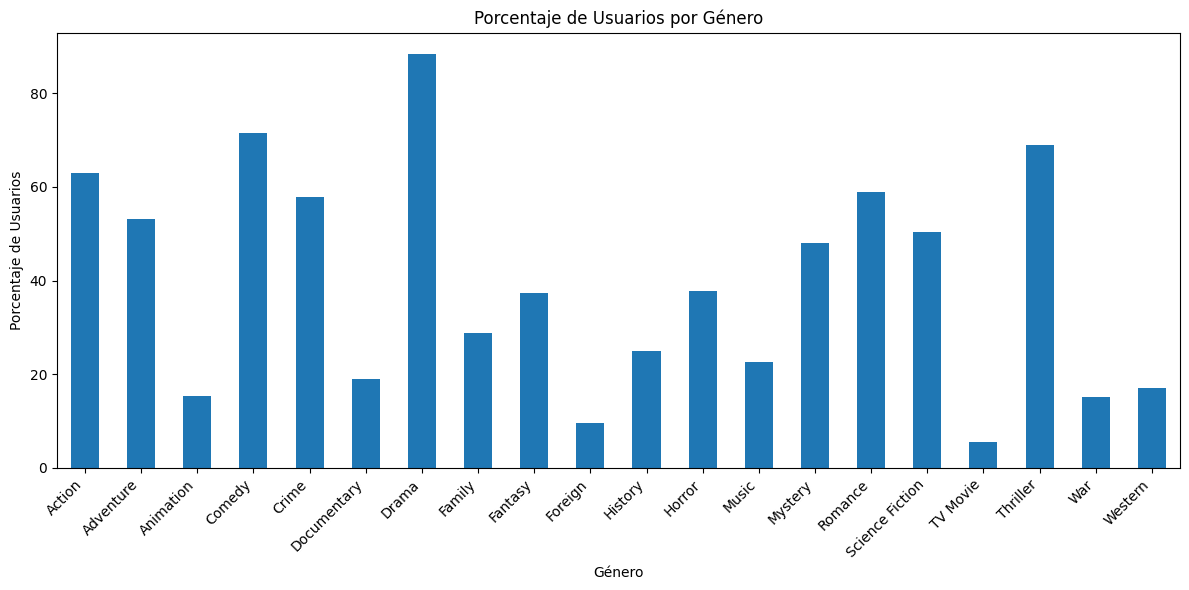

In [22]:
# Calcular el porcentaje de usuarios por género
genre_user_counts = user_gener_c.groupby('genre')['userId'].nunique()
total_users = user_gener_c['userId'].nunique()
genre_user_percentage = (genre_user_counts / total_users) * 100

# Mostrar el porcentaje de usuarios por género
print(genre_user_percentage)
print("Total de usuarios ", total_users)

# Crear un gráfico de barras para visualizar el porcentaje de usuarios por género
plt.figure(figsize=(12, 6))
genre_user_percentage.plot(kind='bar')
plt.title('Porcentaje de Usuarios por Género')
plt.xlabel('Género')
plt.ylabel('Porcentaje de Usuarios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [23]:
# Crear una tabla pivote para obtener el rating por género
user_gener_c= user_gener_c.pivot_table(index=['userId', 'movieId'], columns='genre', values='rating', aggfunc='mean').rename_axis(columns=None)

# Restablecer el índice
user_gener_c = user_gener_c.reset_index()

# Mostrar el DataFrame resultante
user_gener_c.head()


,userId,movieId,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,4226,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,339,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,762,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,780,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,1092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN


In [24]:
# Calcular el promedio del rating por género para cada userId
user_gener_c_mean = user_gener_c.groupby('userId').agg({
    col: lambda x: x.mean(skipna=True) for col in user_gener_c.columns if col not in ['movieId']
})

In [25]:
# Mostrar el DataFrame resultante
user_gener_c_mean.head()

,userId,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,,
1,1.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,3.0,NaN,4.0,NaN,NaN,4.0,NaN,3.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN
4,4.0,3.0,5.0,NaN,2.0,4.0,NaN,2.5,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.0,NaN,5.0
5,5.0,2.0,NaN,NaN,5.0,NaN,NaN,3.5,NaN,NaN,...,NaN,5.0,NaN,NaN,5.0,5.0,NaN,2.0,NaN,NaN


In [26]:
# Fill NaN values with 0
user_gener_c_mean = user_gener_c_mean.fillna(0)
user_gener_c_mean.head()

,userId,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,3.0,0.0,4.0,0.0,0.0,4.0,0.0,3.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0
4,4.0,3.0,5.0,0.0,2.0,4.0,0.0,2.5,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,5.0
5,5.0,2.0,0.0,0.0,5.0,0.0,0.0,3.5,0.0,0.0,...,0.0,5.0,0.0,0.0,5.0,5.0,0.0,2.0,0.0,0.0


In [27]:
from sklearn.cluster import KMeans

# Seleccionar las columnas para el clustering
X = user_gener_c_mean.drop(columns=['userId'])


In [28]:
 def clusters_keamns (k):
  # Elegir el número de clusters (k)
  n_clusters = k  # Puedes ajustar este valor

  # Crear el modelo KMeans
  kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init=10)

  # Ajustar el modelo a los datos
  kmeans.fit(X)

  # Obtener las etiquetas de cluster para cada usuario
  user_gener_c_mean['cluster'] = kmeans.labels_

  # Mostrar el DataFrame con las etiquetas de cluster
  user_gener_c_mean.head()

    # Crear un DataFrame para visualizar los centroides de cada cluster
  cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

  # Transponer el DataFrame para facilitar la visualización
  cluster_centroids_transposed = cluster_centroids.transpose()

  # Graficar los centroides de cada cluster
  plt.figure(figsize=(8, 6))
  for i in range(n_clusters):
    plt.plot(cluster_centroids_transposed.iloc[:, i], label=f'Cluster {i}')

  # Agregar etiquetas y título
  plt.xlabel('Género')
  plt.ylabel('Valor del centroide')
  plt.title('Centroides de Clusters por Género')
  plt.xticks(rotation=90)
  plt.legend()
  plt.tight_layout()
  plt.show()

  return user_gener_c_mean

In [ ]:
from sklearn.metrics import silhouette_score

## NOTA: Esta celda dura aproximadamente 3h en correr

varianza_intra_cluster = []
silhouettes = []
Y = {}
for k in range (1, 21): # Evaluamos entre 1 a 21 clusters posibles
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init=10).fit(X)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(X, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    Y[k] = kmeans.labels_

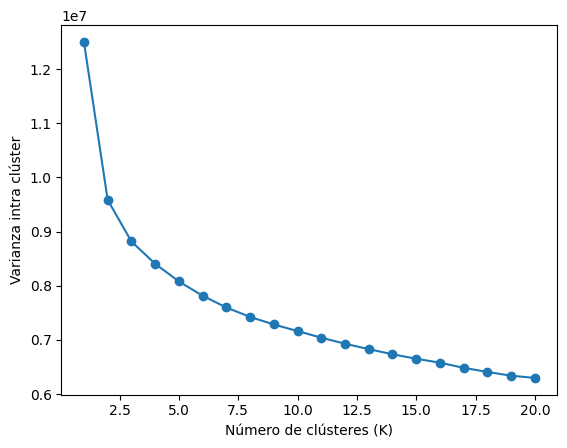

In [ ]:
plt.plot(range(1, 21), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

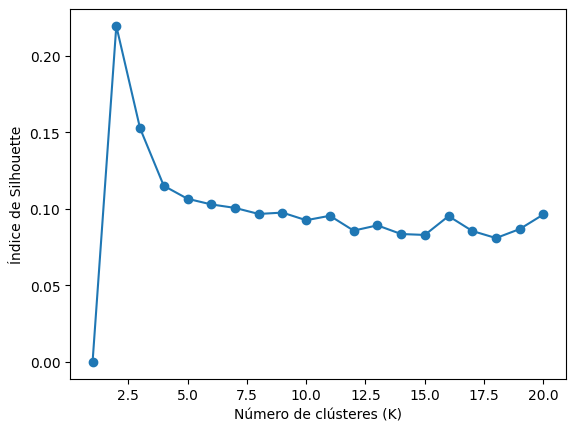

In [ ]:
plt.plot(range(1, 21), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')

plt.grid(True)
plt.show()

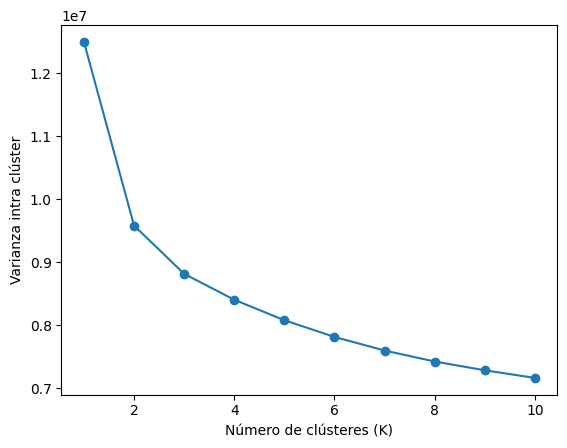

In [ ]:
plt.plot(range(1, 11), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

In [29]:
def prom_genre(df):
  # Calcular el promedio de los ratings de los géneros por cluster
  average_genres_by_cluster = df.groupby('cluster').mean()

  # Seleccionar solo las columnas de géneros
  genre_columns = [col for col in average_genres_by_cluster.columns if col not in ['userId']]

  # Transponer el DataFrame para que los géneros sean las filas y los clusters las columnas
  average_genres_by_cluster_transposed = average_genres_by_cluster[genre_columns].transpose()

  # Graficar el promedio de los ratings de los géneros para cada cluster
  plt.figure(figsize=(8, 6))
  sns.heatmap(average_genres_by_cluster_transposed, annot=True, cmap='viridis', fmt=".2f")
  plt.xlabel('Cluster')
  plt.ylabel('Género')
  plt.title('Promedio de Ratings de Géneros por Cluster')
  plt.show()

  # Mostrar el resultado
  print(average_genres_by_cluster)


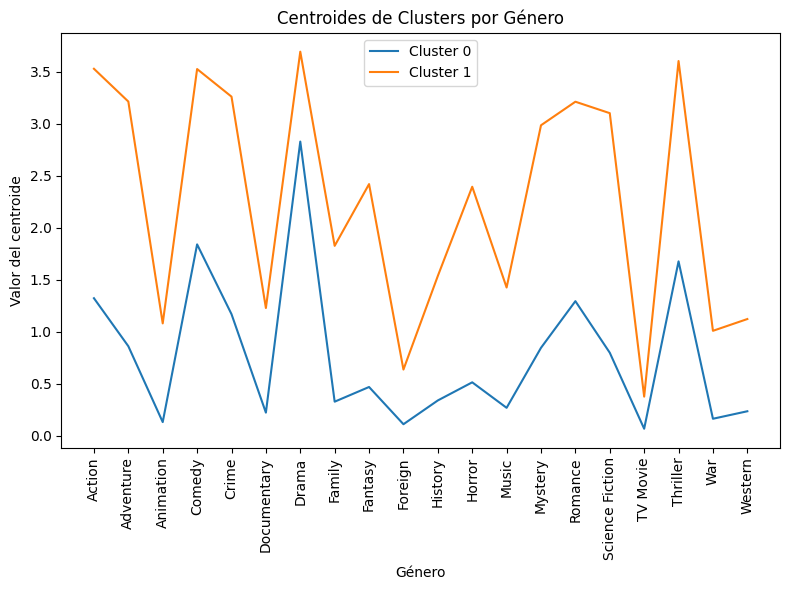

,userId,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,cluster
userId,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2.0,0.0,3.0,0.0,4.0,0.0,0.0,4.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0
4,4.0,3.0,5.0,0.0,2.0,4.0,0.0,2.5,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,5.0,0
5,5.0,2.0,0.0,0.0,5.0,0.0,0.0,3.5,0.0,0.0,...,5.0,0.0,0.0,5.0,5.0,0.0,2.0,0.0,0.0,0


In [31]:
clusters_2 = clusters_keamns(2)
clusters_2.head(5)

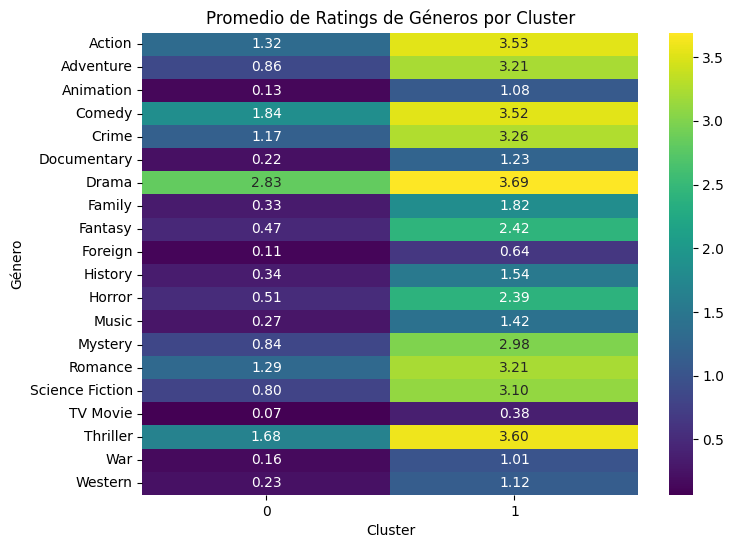

                userId    Action  Adventure  Animation    Comedy     Crime  \
cluster                                                                      
0        135591.457767  1.320825   0.859319   0.130227  1.838112  1.167732   
1        135270.560545  3.526329   3.211339   1.079043  3.524095  3.258529   

         Documentary     Drama    Family   Fantasy  ...   History    Horror  \
cluster                                             ...                       
0           0.221127  2.826568  0.326249  0.467749  ...  0.338403  0.512490   
1           1.226875  3.690871  1.824491  2.417601  ...  1.535109  2.392199   

            Music   Mystery   Romance  Science Fiction  TV Movie  Thriller  \
cluster                                                                      
0        0.267506  0.844473  1.292430         0.796854  0.066347  1.675288   
1        1.423707  2.982997  3.209981         3.099564  0.375044  3.600753   

              War   Western  
cluster                    

In [32]:
prom_genre(clusters_2)

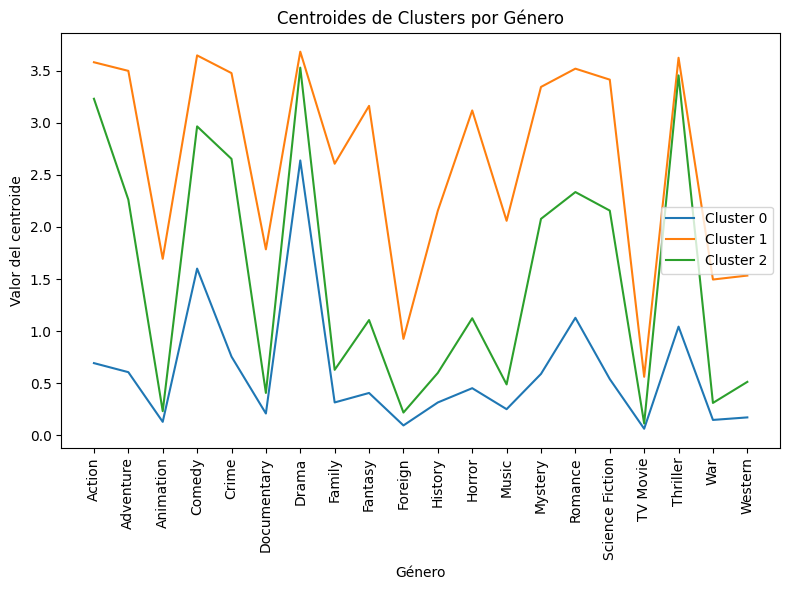

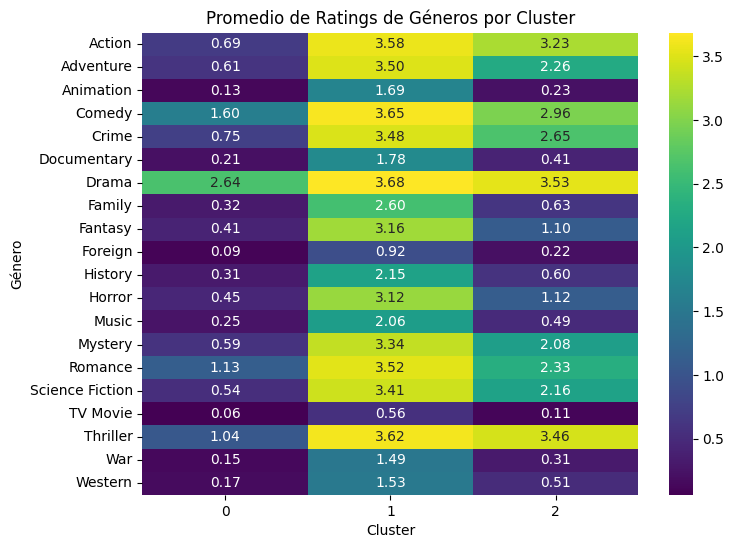

                userId    Action  Adventure  Animation    Comedy     Crime  \
cluster                                                                      
0        135631.872299  0.690211   0.605742   0.128596  1.600319  0.754691   
1        135414.561944  3.581279   3.498392   1.691705  3.647524  3.476345   
2        135265.039989  3.230635   2.259205   0.231116  2.963161  2.651660   

         Documentary     Drama    Family   Fantasy  ...   History    Horror  \
cluster                                             ...                       
0           0.208726  2.637892  0.315040  0.405943  ...  0.314777  0.451838   
1           1.783279  3.683329  2.604837  3.161174  ...  2.154579  3.117918   
2           0.405616  3.529009  0.626941  1.104024  ...  0.597943  1.120834   

            Music   Mystery   Romance  Science Fiction  TV Movie  Thriller  \
cluster                                                                      
0        0.250141  0.588908  1.128118         0.538426  0

In [33]:
clusters_3 = clusters_keamns(3)
clusters_3.head(5)
prom_genre(clusters_3)

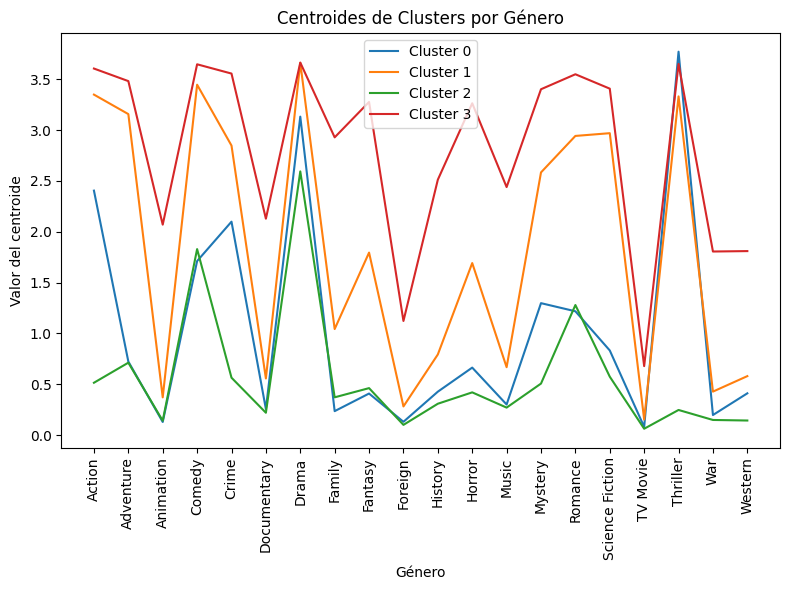

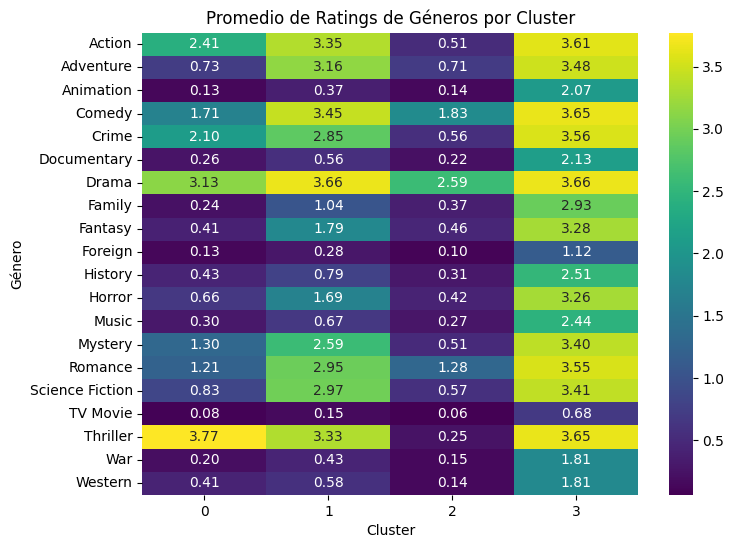

                userId    Action  Adventure  Animation    Comedy     Crime  \
cluster                                                                      
0        135664.929873  2.405074   0.725409   0.128931  1.709556  2.097807   
1        135210.723584  3.349085   3.155033   0.371375  3.448114  2.849513   
2        135529.370753  0.514945   0.712438   0.141671  1.830203  0.564868   
3        135411.162485  3.606413   3.483102   2.071714  3.647783  3.556655   

         Documentary     Drama    Family   Fantasy  ...   History    Horror  \
cluster                                             ...                       
0           0.255889  3.132031  0.235947  0.408956  ...  0.426980  0.662787   
1           0.558023  3.662167  1.043248  1.794808  ...  0.793883  1.693429   
2           0.220132  2.594229  0.371699  0.462109  ...  0.308867  0.420596   
3           2.129215  3.664826  2.929984  3.278123  ...  2.512871  3.264441   

            Music   Mystery   Romance  Science Fiction  

In [34]:
clusters_4 = clusters_keamns(4)
prom_genre(clusters_4)

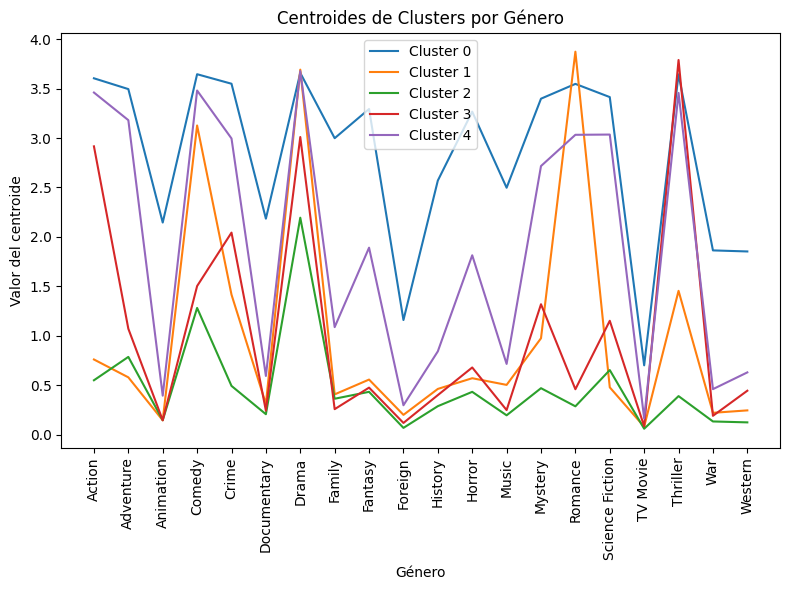

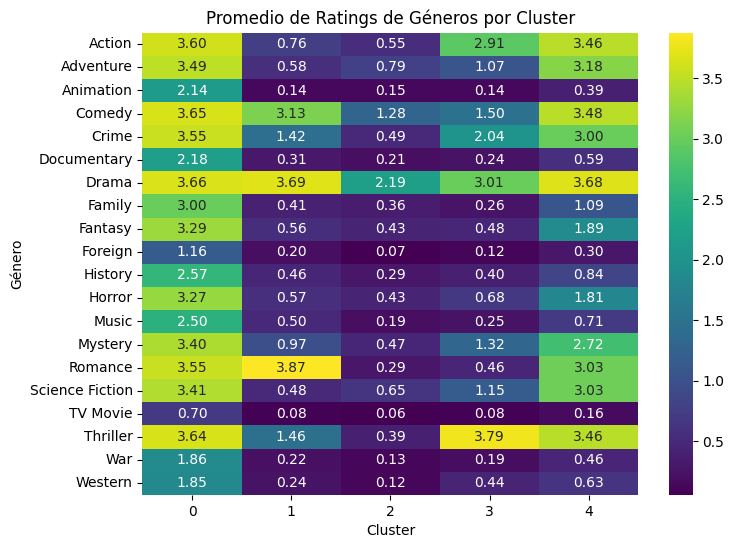

                userId    Action  Adventure  Animation    Comedy     Crime  \
cluster                                                                      
0        135567.224593  3.604258   3.494993   2.144336  3.645698  3.549260   
1        134854.916512  0.761870   0.578758   0.144277  3.127079  1.416803   
2        135793.541110  0.548968   0.786144   0.145666  1.281933  0.492374   
3        135865.900802  2.913424   1.069370   0.144649  1.499013  2.040306   
4        135126.658312  3.460559   3.180493   0.393007  3.480637  2.995669   

         Documentary     Drama    Family   Fantasy  ...   History    Horror  \
cluster                                             ...                       
0           2.183312  3.658915  2.998074  3.293991  ...  2.568822  3.266989   
1           0.309762  3.692002  0.406689  0.556079  ...  0.462138  0.570220   
2           0.205766  2.194980  0.362554  0.431845  ...  0.287117  0.432081   
3           0.241678  3.007968  0.256738  0.476044  ...  0

In [35]:
clusters_5 = clusters_keamns(5)
prom_genre(clusters_5)

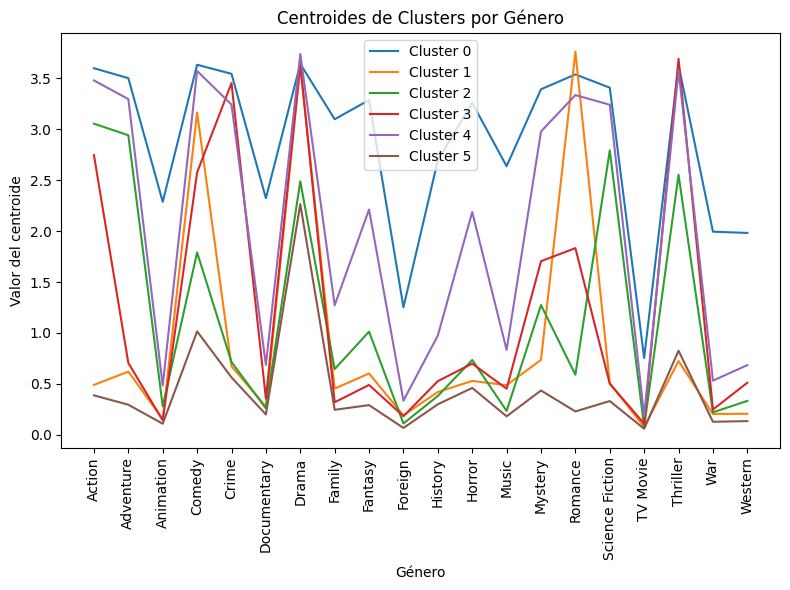

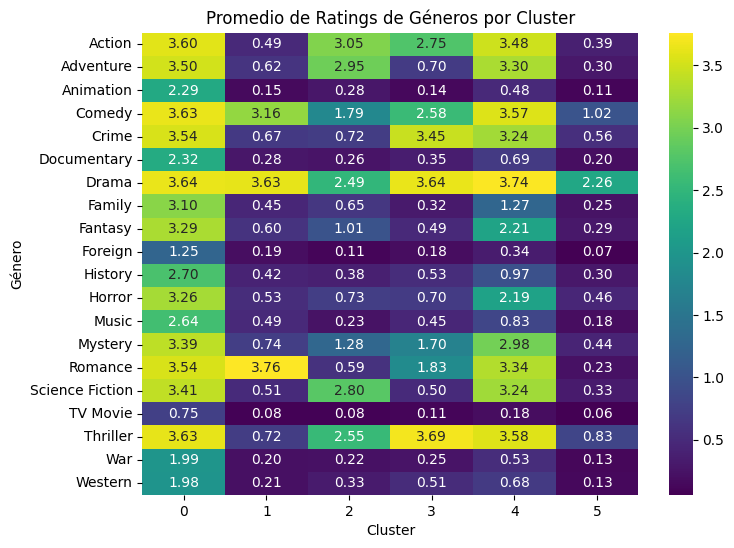

                userId    Action  Adventure  Animation    Comedy     Crime  \
cluster                                                                      
0        135561.405069  3.599823   3.502250   2.288531  3.634009  3.544811   
1        134921.162983  0.490107   0.619059   0.153315  3.164786  0.673499   
2        135923.507046  3.054402   2.945756   0.279513  1.794800  0.716670   
3        135430.884746  2.746477   0.704235   0.141961  2.575344  3.452007   
4        135162.145521  3.480195   3.295349   0.482597  3.573770  3.243509   
5        135680.484610  0.388298   0.295642   0.108739  1.015089  0.563162   

         Documentary     Drama    Family   Fantasy  ...   History    Horror  \
cluster                                             ...                       
0           2.322805  3.643179  3.099337  3.287153  ...  2.695793  3.258948   
1           0.277928  3.627386  0.452953  0.601597  ...  0.420771  0.528968   
2           0.259243  2.491338  0.646977  1.013609  ...  0.

In [36]:
clusters_6 = clusters_keamns(6)
prom_genre(clusters_6)

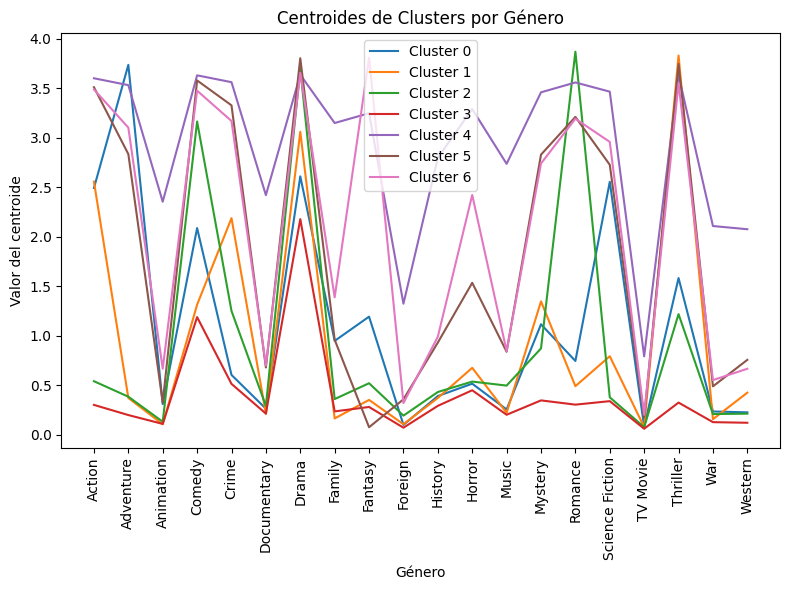

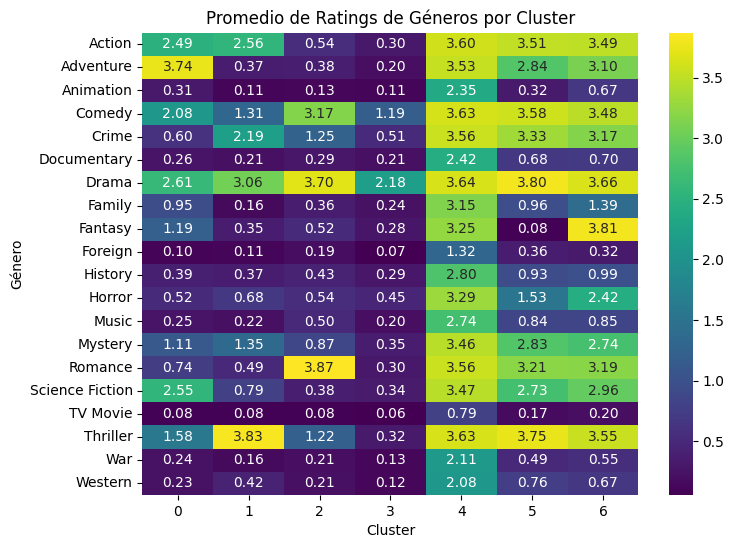

                userId    Action  Adventure  Animation    Comedy     Crime  \
cluster                                                                      
0        136222.650426  2.493263   3.736836   0.309210  2.084039  0.602145   
1        135967.540431  2.556146   0.369667   0.105070  1.314369  2.189880   
2        134973.788382  0.540347   0.383823   0.130801  3.165937  1.249317   
3        135625.458474  0.300930   0.198202   0.108701  1.187988  0.513055   
4        135483.313048  3.601479   3.532104   2.353912  3.631130  3.562052   
5        134891.925044  3.511102   2.836613   0.324086  3.579744  3.327664   
6        135114.328125  3.487977   3.102857   0.666135  3.476306  3.168880   

         Documentary     Drama    Family   Fantasy  ...   History    Horror  \
cluster                                             ...                       
0           0.262029  2.609214  0.946235  1.192231  ...  0.389583  0.515501   
1           0.210804  3.061570  0.163771  0.351063  ...  0.3

In [37]:
clusters_7 = clusters_keamns(7)
prom_genre(clusters_7)

In [40]:
def cant_usuarios(df):
  # Contar la cantidad de usuarios en cada cluster
  cluster_user_counts = df.groupby('cluster').size()
  cluster_user_counts = cluster_user_counts.rename('user_count')

  # Calcular el porcentaje de usuarios en cada cluster
  total_users = len(df)
  cluster_user_percentage = (cluster_user_counts / total_users) * 100

  # Crear un gráfico de barras para visualizar el porcentaje de usuarios por cluster
  plt.figure(figsize=(12, 6))
  cluster_user_percentage.plot(kind='bar')
  plt.title('Porcentaje de Usuarios por Cluster')
  plt.xlabel('Cluster')
  plt.ylabel('Porcentaje de Usuarios')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()


In [41]:
def top_5 (df, df_cluster):
  # Calcular el rating promedio de las películas por cluster, teniendo en cuenta la cantidad de personas
  cluster_movie_ratings = df.groupby(['cluster', 'original_title'])['rating'].agg(['mean', 'count']).reset_index()

  cluster_user_counts = df_cluster.groupby('cluster').size()
  cluster_user_counts = cluster_user_counts.rename('user_count')

  # Combinar el total de usuarios con el DataFrame original
  cluster_movie_ratings = cluster_movie_ratings.merge(cluster_user_counts, on='cluster')

  cluster_movie_ratings['media_ponderada'] = ((cluster_movie_ratings['mean'] * cluster_movie_ratings['count']) / cluster_movie_ratings['user_count']).round(2)

  # Ordenar por rating promedio y cantidad de personas
  cluster_movie_ratings = cluster_movie_ratings.sort_values(['cluster', 'media_ponderada'], ascending=[True, False])

  # Obtener el top 5 de películas por cluster
  top_5_movies_by_cluster = {}
  for cluster in cluster_movie_ratings['cluster'].unique():
    top_5_movies_by_cluster[cluster] = cluster_movie_ratings[cluster_movie_ratings['cluster'] == cluster].head(5)

  # Mostrar el top 5 de películas por cluster junto con su género
  for cluster, df_cluster in top_5_movies_by_cluster.items():
    print(f"\nCluster {cluster}:")
    for index, row in df_cluster.iterrows():
      movie_title = row['original_title']
      movie_rating = row['mean']
      movie_ponderada = row['media_ponderada']

      # Obtener el género de la película
      movie_genre = df[(df['cluster'] == cluster) & (df['original_title'] == movie_title)]['genre_names'].iloc[0]
      print(f"Película: {movie_title}, Rating promedio: {movie_rating:.2f}, Ponderado :{movie_ponderada}, Género: {movie_genre}")



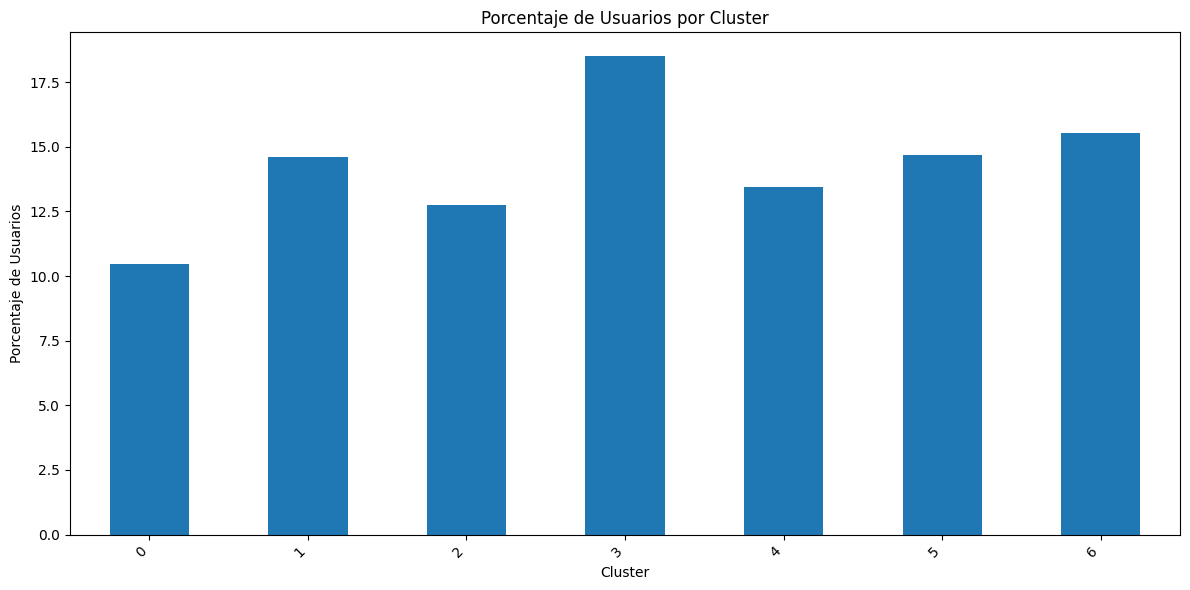


Cluster 0:
Película: Солярис, Rating promedio: 4.21, Ponderado :0.53, Género: ['Drama', 'Science Fiction', 'Adventure', 'Mystery']
Película: Men in Black II, Rating promedio: 4.09, Ponderado :0.24, Género: ['Action', 'Adventure', 'Comedy', 'Science Fiction']
Película: ...Più forte ragazzi!, Rating promedio: 3.89, Ponderado :0.2, Género: ['Adventure', 'Action', 'Comedy']
Película: Back to the Future Part II, Rating promedio: 3.57, Ponderado :0.2, Género: ['Adventure', 'Comedy', 'Family', 'Science Fiction']
Película: Terminator 3: Rise of the Machines, Rating promedio: 3.93, Ponderado :0.17, Género: ['Action', 'Thriller', 'Science Fiction']

Cluster 1:
Película: The Million Dollar Hotel, Rating promedio: 4.56, Ponderado :0.55, Género: ['Drama', 'Thriller']
Película: The 39 Steps, Rating promedio: 4.22, Ponderado :0.36, Género: ['Action', 'Thriller', 'Mystery']
Película: 5 Card Stud, Rating promedio: 4.26, Ponderado :0.29, Género: ['Action', 'Western', 'Thriller']
Película: Terminator 3:

In [42]:
clusters_5 = clusters_5.reset_index(drop=True)

# Agregar la columna 'cluster' de clusters_5 a user_gener_c
user_gener_c5 = pd.merge(usuarios_clusters, clusters_5[['userId', 'cluster']], on='userId', how='left')

cant_usuarios(clusters_5)

top_5(user_gener_c5, clusters_5)


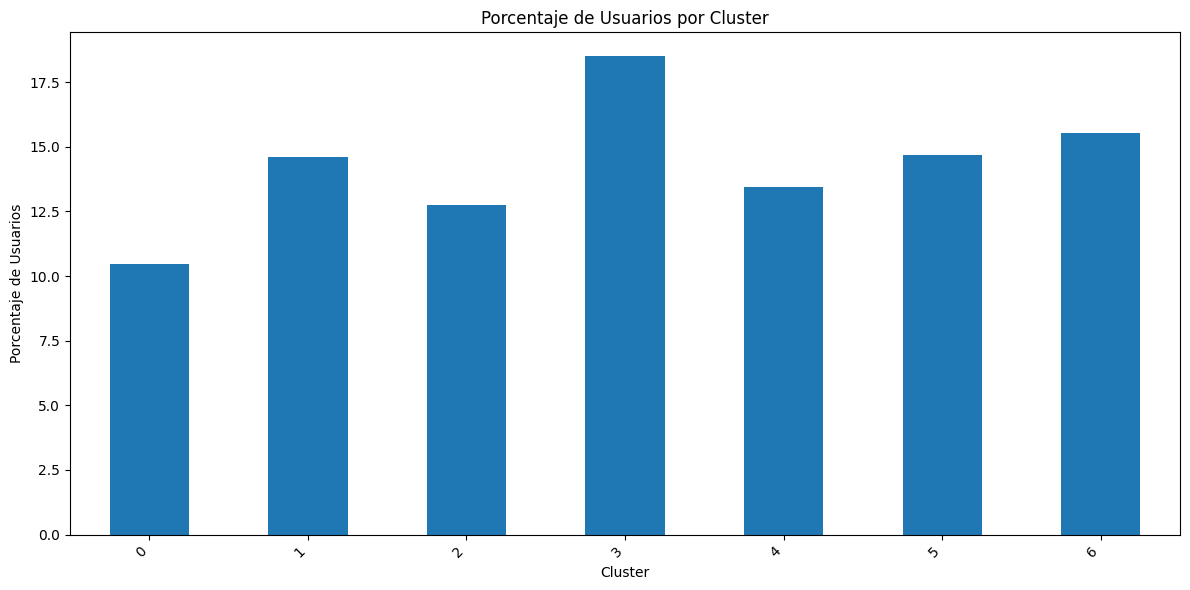


Cluster 0:
Película: Солярис, Rating promedio: 4.21, Ponderado :0.53, Género: ['Drama', 'Science Fiction', 'Adventure', 'Mystery']
Película: Men in Black II, Rating promedio: 4.09, Ponderado :0.24, Género: ['Action', 'Adventure', 'Comedy', 'Science Fiction']
Película: ...Più forte ragazzi!, Rating promedio: 3.89, Ponderado :0.2, Género: ['Adventure', 'Action', 'Comedy']
Película: Back to the Future Part II, Rating promedio: 3.57, Ponderado :0.2, Género: ['Adventure', 'Comedy', 'Family', 'Science Fiction']
Película: Terminator 3: Rise of the Machines, Rating promedio: 3.93, Ponderado :0.17, Género: ['Action', 'Thriller', 'Science Fiction']

Cluster 1:
Película: The Million Dollar Hotel, Rating promedio: 4.56, Ponderado :0.55, Género: ['Drama', 'Thriller']
Película: The 39 Steps, Rating promedio: 4.22, Ponderado :0.36, Género: ['Action', 'Thriller', 'Mystery']
Película: 5 Card Stud, Rating promedio: 4.26, Ponderado :0.29, Género: ['Action', 'Western', 'Thriller']
Película: Terminator 3:

In [43]:
clusters_6 = clusters_6.reset_index(drop=True)

# Agregar la columna 'cluster' de clusters_6 a user_gener_c
user_gener_c6 = pd.merge(usuarios_clusters, clusters_6[['userId', 'cluster']], on='userId', how='left')

cant_usuarios(clusters_6)

top_5(user_gener_c6, clusters_6)


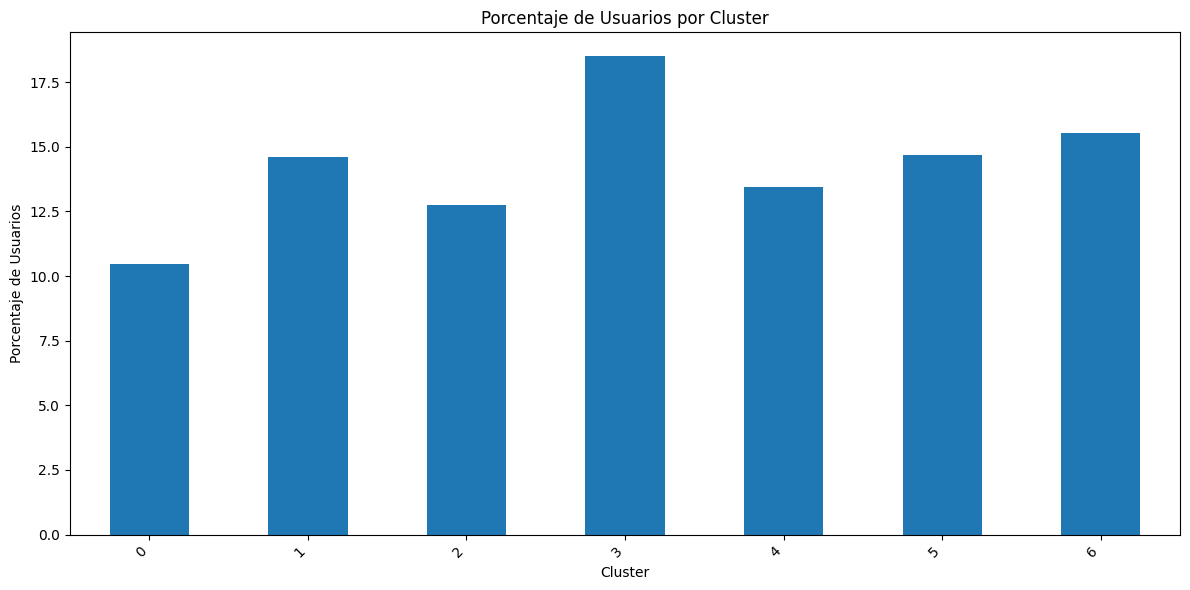


Cluster 0:
Película: Солярис, Rating promedio: 4.21, Ponderado :0.53, Género: ['Drama', 'Science Fiction', 'Adventure', 'Mystery']
Película: Men in Black II, Rating promedio: 4.09, Ponderado :0.24, Género: ['Action', 'Adventure', 'Comedy', 'Science Fiction']
Película: ...Più forte ragazzi!, Rating promedio: 3.89, Ponderado :0.2, Género: ['Adventure', 'Action', 'Comedy']
Película: Back to the Future Part II, Rating promedio: 3.57, Ponderado :0.2, Género: ['Adventure', 'Comedy', 'Family', 'Science Fiction']
Película: Terminator 3: Rise of the Machines, Rating promedio: 3.93, Ponderado :0.17, Género: ['Action', 'Thriller', 'Science Fiction']

Cluster 1:
Película: The Million Dollar Hotel, Rating promedio: 4.56, Ponderado :0.55, Género: ['Drama', 'Thriller']
Película: The 39 Steps, Rating promedio: 4.22, Ponderado :0.36, Género: ['Action', 'Thriller', 'Mystery']
Película: 5 Card Stud, Rating promedio: 4.26, Ponderado :0.29, Género: ['Action', 'Western', 'Thriller']
Película: Terminator 3:

In [44]:
clusters_7 = clusters_7.reset_index(drop=True)

# Agregar la columna 'cluster' de clusters_7 a user_gener_c
user_gener_c7 = pd.merge(usuarios_clusters, clusters_7[['userId', 'cluster']], on='userId', how='left')

cant_usuarios(clusters_7)

top_5(user_gener_c7, clusters_7)